# Data preparation for COVID-19

Data is downloaded daily from the Johns Hopkins University github repo. 

Three tables are used:
- [Time series Confirmed cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv)
- [Time series Deaths cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv)
- [Time series Recovered cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv)


Autres infos:
400 lits en rea

In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go

In [2]:
!wget -O ../data/raw/time_series_19-covid-Confirmed.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
!wget -O ../data/raw/time_series_19-covid-Deaths.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
!wget -O ../data/raw/time_series_19-covid-Recovered.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

--2020-03-16 22:41:25--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.120.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.120.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68907 (67K) [text/plain]
Saving to: ‘../data/raw/time_series_19-covid-Confirmed.csv’

../data/raw/time_se 100%[===================>]  67.29K  --.-KB/s    in 0.02s   

2020-03-16 22:41:25 (3.83 MB/s) - ‘../data/raw/time_series_19-covid-Confirmed.csv’ saved [68907/68907]

--2020-03-16 22:41:25--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.120.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [3]:
df_confirmed = pd.read_csv('../data/raw/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('../data/raw/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('../data/raw/time_series_19-covid-Recovered.csv')

In [4]:
df_confirmed['Country/Region'].value_counts()

US             247
China           33
Canada          10
Australia        9
France           6
              ... 
Afghanistan      1
Israel           1
Morocco          1
Philippines      1
Russia           1
Name: Country/Region, Length: 147, dtype: int64

In [5]:
df_confirmed['Location'] = df_confirmed['Province/State'].astype(str) + '__' + df_confirmed['Country/Region'].astype(str)

In [6]:
df_confirmed['Location'] = df_confirmed['Location'].apply(lambda x: x.replace('nan__', ''))

In [7]:
df_confirmed = df_confirmed.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,Location
0,2,3,5,7,8,8,14,14,14,19,...,50,50,50,53,59,70,75,82,114,Thailand
1,2,1,2,2,4,4,7,7,11,15,...,461,502,511,581,639,639,701,773,839,Japan
2,0,1,3,3,4,5,7,7,10,13,...,138,150,150,160,178,178,200,212,226,Singapore
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Nepal
4,0,0,0,3,4,4,4,7,8,8,...,93,99,117,129,149,149,197,238,428,Malaysia


In [8]:
df_confirmed_ts = pd.pivot_table(df_confirmed, columns=['Location'])

In [9]:
df_confirmed_ts.index = pd.to_datetime(df_confirmed_ts.index)

In [10]:
df_confirmed_ts.head()

Location,"Adams, IN__US",Afghanistan,Alabama__US,"Alachua, FL__US","Alameda County, CA__US",Alaska__US,Albania,Alberta__Canada,Algeria,Andorra,...,"Whatcom, WA__US","Williamson County, TN__US",Wisconsin__US,"Worcester, MA__US",Wyoming__US,Xinjiang__China,"Yolo County, CA__US",YunChina,Zhejiang__China,occupied Palestinian territory
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,2,27,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,5,43,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,11,62,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,16,104,0


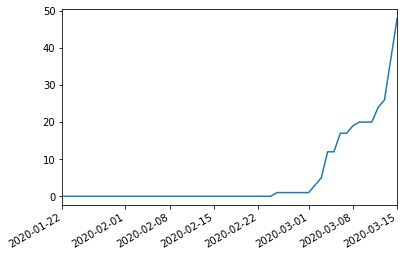

In [15]:
df_confirmed_ts['Algeria'].plot()

In [23]:
del df_confirmed_ts.index.name

In [24]:
df_confirmed_ts

Location,"Adams, IN__US",Afghanistan,Alabama__US,"Alachua, FL__US","Alameda County, CA__US",Alaska__US,Albania,Alberta__Canada,Algeria,Andorra,...,"Whatcom, WA__US","Williamson County, TN__US",Wisconsin__US,"Worcester, MA__US",Wyoming__US,Xinjiang__China,"Yolo County, CA__US",YunChina,Zhejiang__China,occupied Palestinian territory
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,2,27,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,5,43,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,11,62,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,16,104,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,26,128,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,44,173,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13,0,55,296,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14,0,70,428,0
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0,83,538,0


In [25]:
df_confirmed_ts.to_csv('../data/interim/time_series_covid-19-Confirmed.csv', index=True)

## Let's do the same preprocess for deaths and recovered

In [27]:
df_deaths['Location'] = df_deaths['Province/State'].astype(str) + '__' + df_deaths['Country/Region'].astype(str)
df_recovered['Location'] = df_recovered['Province/State'].astype(str) + '__' + df_recovered['Country/Region'].astype(str)

In [28]:
df_deaths['Location'] = df_deaths['Location'].apply(lambda x: x.replace('nan__', ''))
df_recovered['Location'] = df_recovered['Location'].apply(lambda x: x.replace('nan__', ''))

In [29]:
df_deaths = df_deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,Location
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Thailand
1,0,0,0,0,0,0,0,0,0,0,...,6,6,10,10,15,16,19,22,22,Japan
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Singapore
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Nepal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaysia


In [30]:
df_recovered = df_recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,Location
0,0,0,0,0,2,2,5,5,5,5,...,31,31,31,33,34,34,35,35,35,Thailand
1,0,0,0,0,1,1,1,1,1,1,...,76,76,76,101,118,118,118,118,118,Japan
2,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,96,96,97,105,105,Singapore
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Nepal
4,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,26,26,26,35,42,Malaysia


In [31]:
df_deaths_ts = pd.pivot_table(df_deaths, columns=['Location'])
df_deaths_ts.index = pd.to_datetime(df_deaths_ts.index)

df_recovered_ts = pd.pivot_table(df_recovered, columns=['Location'])
df_recovered_ts.index = pd.to_datetime(df_recovered_ts.index)

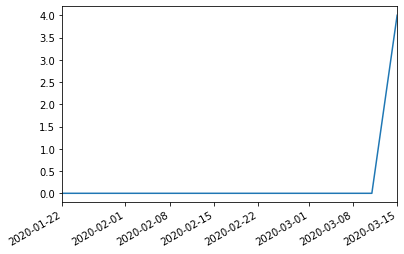

In [32]:
df_deaths_ts['Algeria'].plot()

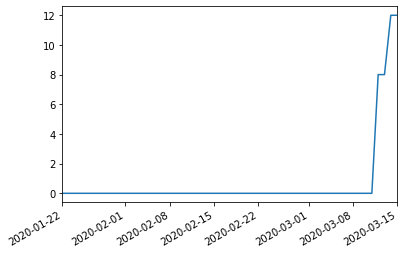

In [33]:
df_recovered_ts['Algeria'].plot()

In [34]:
df_deaths_ts.to_csv('../data/interim/time_series_covid-19-Deaths.csv', index=True)
df_recovered_ts.to_csv('../data/interim/time_series_covid-19-Recovered.csv', index=True)

## External data

In [1]:
import json

In [2]:
with open('../data/external/algeria.json') as f:
    algeria_map = json.load(f)

In [9]:
algeria_map['features'][3]['properties']

{'name': 'Illizi', 'id': 33}